## Entfernung des Scannerhintergrunds

In [93]:
%matplotlib inline
from glob import glob
from scipy.ndimage import imread
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import cv2   
import ocrolib

'2.4.10'

[500 518  38]


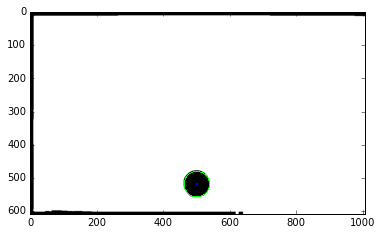

In [212]:
def find_circles(fname):
    img = sp.misc.imread(fname,True)
    img = (img).round().astype(np.uint8)
    img = cv2.medianBlur(img,5)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

     # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = 255 - cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 6)
    opening = cv2.GaussianBlur(opening,(5,5),1.2)
    circles = cv2.HoughCircles(opening,cv2.cv.CV_HOUGH_GRADIENT,1,10,maxRadius=50, minRadius=35,param2=20)
    if isinstance(circles, type(None)):
        print 'No circles detected'
        return opening, [[]]
    else:
        return opening, circles

img, circles = find_circles('../catalog-buffer/SD/SD00100000010.png')
circles = np.uint16(np.around(circles))
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
for i in circles[0,:]:
    # draw the outer circle
    print i
    cv2.circle(cimg,(i[0],i[1]),int(i[2] ),(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
# plt.imshow(img,cmap='gray')

In [266]:
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
for fname in glob('../catalog-buffer/SD/SD0010000000?.png'):
    img, circles = find_circles(fname)
    print circles
    for i in circles[0,:]:
        # draw the outer circle
        print i
        cv2.circle(cimg,(i[0],i[1]),int(i[2] ),(0,255,0),2)
        # draw the center of the circle
        cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)

[[[ 504.5        520.5         40.3298912]]]
[ 504.5        520.5         40.3298912]
[[[ 503.5         514.5          40.18083954]]]
[ 503.5         514.5          40.18083954]
No circles detected
[[]]


TypeError: list indices must be integers, not tuple

In [316]:
def remove_black_background(fname,ftarget): 
    img = sp.ndimage.imread(fname,mode='RGB')
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray,10,255,cv2.THRESH_BINARY_INV)
     # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 15)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_DILATE,kernel, iterations = 2)
    opening = cv2.GaussianBlur(opening,(9,9),2,2)
    
    mask = cv2.cvtColor(opening, cv2.COLOR_GRAY2RGB)
    opening = cv2.add(img, mask)
    sp.misc.imsave(ftarget,opening,'png')


(704, 1016, 3)
uint8


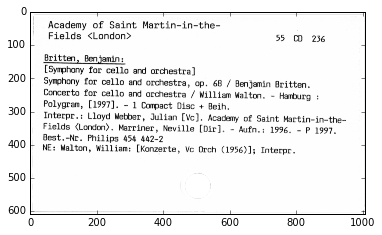

In [314]:
files = glob('../catalog-testset/SD???????????.bin.png')
# filesp

remove_black_background('../catalog-buffer/SD/SD00200000257.png', '../result-preprocessing/SD00200000257.png')
plt.imshow(cv2.add(img,opening),cmap='gray')



In [317]:
import catalogutils
for fname, tname in catalogutils.transform('../catalog-testset/','../result-preprocessing/','SD???????????.png'):
    remove_black_background(fname,tname)

../catalog-testset/SD???????????.png
